In [2]:
#Revision of what we performed lastly
#import the necessary libraries
import mglearn
import numpy as np
import pandas as pd

#Loading the datasets
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state = 0)

#Spliting the datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

#Building a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Evaluating the model
print("The test accuracy is: {}".format(logreg.score(X_test,y_test)))



The test accuracy is: 0.88


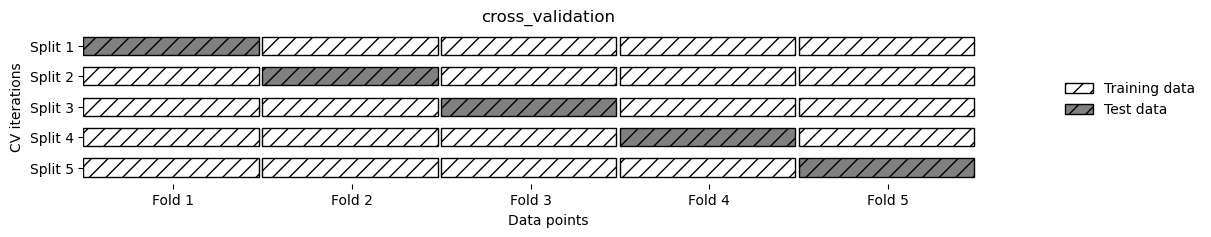

In [5]:
#Cross Validation
import mglearn

#Illustration
mglearn.plots.plot_cross_validation()


In [54]:
#Cross Validation in sklearn
#Example
#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Building a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

#Evaluating the model
from sklearn.model_selection import cross_val_score
#By default, cross_val_score performs five-fold cross validation
#We my use a parameter cv to choose our own  number of fold
score = cross_val_score(logreg, iris.data, iris.target , cv = 3)
print("Cross-Validation scores: {}".format(score))

#A common way to summarize the cross-validation accuracy is by  computing the mean
print("Average Cross-Validation score: {}".format(score.mean()))


Cross-Validation scores: [0.98 0.96 0.98]
Average Cross-Validation score: 0.9733333333333333


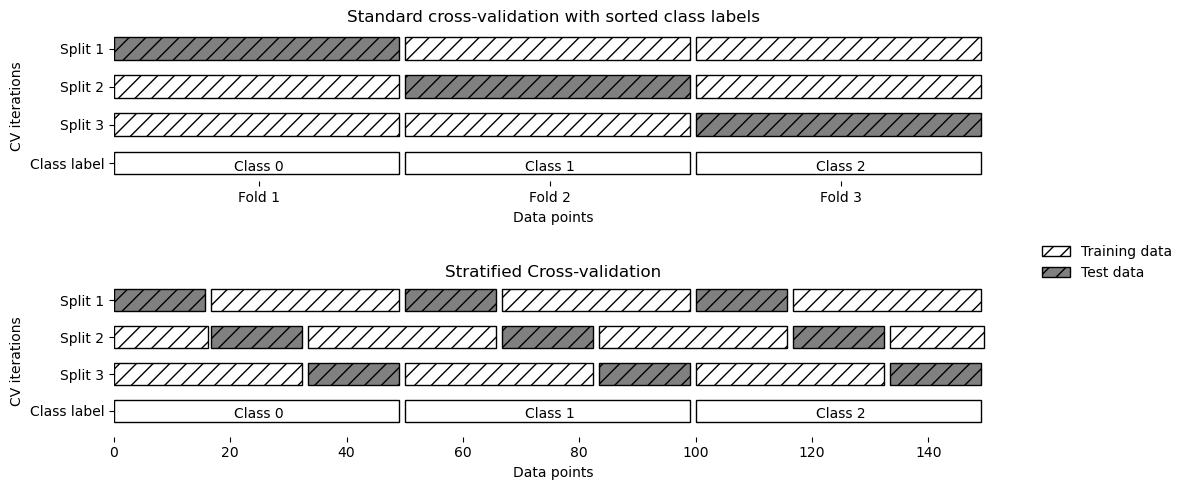

In [25]:
#Strategies on Cross-Validation
#1.Stratified k-Fold Cross-Validation
import mglearn

#Illustration
mglearn.plots.plot_stratified_cross_validation()



In [38]:
#Strategies on Cross-Validation
#Example
#1.Stratified k-Fold Cross-Validation
#Loading the datasets 
from sklearn.datasets import load_iris
iris = load_iris()

#Separate the datasets
from sklearn.model_selection import KFold
# To control this we may set shuffle = True
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)

#Building the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)


#Evaluating the model
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: {}".format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))





Cross Validation Score: [1.         0.83333333 1.         1.         0.93333333]


In [43]:
#2.Leave-one-out Cross-validation
#This consider each fold as a single sample

#Loading the datasets 
from sklearn.datasets import load_iris
iris = load_iris()

#Building a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

#Separate the datasets
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
#Evaluate the model
print("Number of cv iterations:",len(scores))
print("Mean accuracy: {}".format(score.mean()))
      



Number of cv iterations: 150
Mean accuracy: 0.9666666666666667


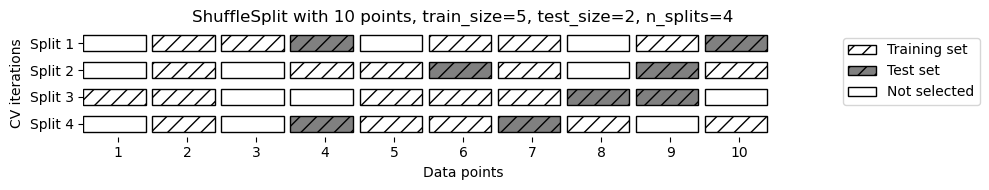

In [44]:
#3.Shuffle-split cross-validation
#Illustration
mglearn.plots.plot_shuffle_split()

In [45]:
#3.Shuffle-split cross-validation
#Example
#Loading the datasets 
from sklearn.datasets import load_iris
iris = load_iris()

#Building a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

#Separate the datasets
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size = .5, train_size = .5, n_splits = 10)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, iris.data, iris.target,cv = shuffle_split)

#Evaluate
print("Cross Validation Scores:\n{}".format(scores))



Cross Validation Scores:
[0.97333333 0.94666667 0.96       0.98666667 0.94666667 0.97333333
 0.93333333 0.93333333 0.94666667 0.96      ]


In [52]:
#4.Cross-Validation with Groups

#Loading the datasets
#Create synthetic datasets
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples = 12, random_state = 0)
#Assume the first three sample belong to the same group
#Then the next four ,etc.
groups = [0,0,0,1,1,1,1,2,2,3,3,3]

#Building a model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)

#Separate the datasets
from sklearn.model_selection import GroupKFold

#Evaluate
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, groups = groups, cv = GroupKFold(n_splits = 3))
print("Cross-Validation scores: \n{}".format(scores))





Cross-Validation scores: 
[1. 1. 1.]


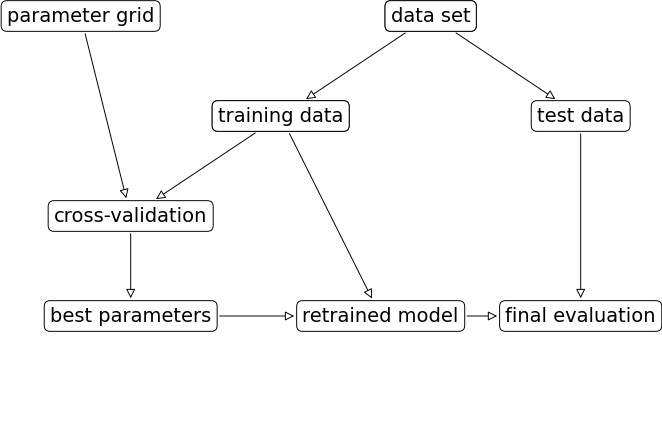

In [63]:
#Grid Search
#Simple Grid Search
import mglearn
mglearn.plots.plot_grid_search_overview()

In [61]:
#Grid Search
#Simple Grid Search

#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Splinting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

#Naive grid search implementation
from sklearn.svm import SVC
#Initiate the best_score
best_score = 0
#For SVM the important parameters used are gamma and c
#Looping some values of gamma and c to find a combination
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #for each combination of parameters, trainan SVC
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        #Evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        #If we got the best score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

#View the best score and best parameter obtained
print("The best score is: {:.2f}".format(best_score))
print("Best parameters are: {}".format(best_parameters))


        
        



The best score is: 0.97
Best parameters are: {'C': 100, 'gamma': 0.001}


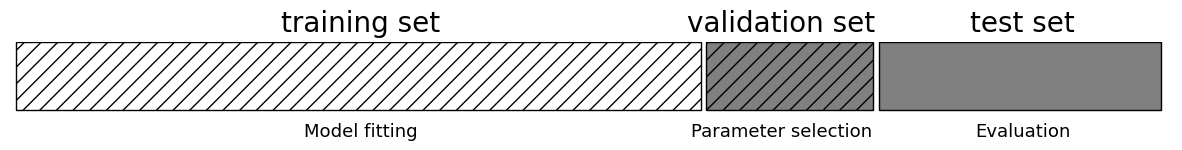

In [64]:
#The danger of overfitting the parameter andthe validation set
#Illustration
import mglearn
mglearn.plots.plot_threefold_split()


In [65]:
#The danger of overfitting the parameter andthe validation set
#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Splinting the dataset
#split data into train+validation set and test set
from sklearn.model_selection import train_test_split
X_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
#split train+validation into train set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
#Initiate the best_score
best_score = 0
#We again use the SVC
from sklearn.svm import SVC
#For SVM the important parameters used are gamma and c
#Looping some values of gamma and c to find a combination
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #for each combination of parameters, trainan SVC
        svm = SVC(gamma = gamma, C = C)
        svm.fit(X_train, y_train)
        #Evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        #If we got the best score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

#Rebuilding the model on the combined training and validation set,
#And evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test score with the best parameter: {}".format(test_score))






Best score on validation set: 0.9642857142857143
Best parameters: {'C': 10, 'gamma': 0.001}
Test score with the best parameter: 0.9210526315789473


In [73]:
#Grid Search with Cross-Validation
#1.Normal hard coded
#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Splinting the dataset
#split data into train+validation set and test set
from sklearn.model_selection import train_test_split
X_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state = 0)
#split train+validation into train set and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = 1)
#Initiate the best_score
best_score = 0
#We again use the SVC
from sklearn.svm import SVC
#For SVM the important parameters used are gamma and c
#Looping some values of gamma and c to find a combination
#Import firs cross validation
from sklearn.model_selection import cross_val_score
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #for each combination of parameters, trainan SVC
        svm = SVC(gamma = gamma, C = C)
        
        #Perform cross_validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv = 5)
        #Compute mean validation accuracy
        score = np.mean(scores)
        #If we got the best score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {"C": C, "gamma": gamma}

#Rebuilding the model on the combined training and validation set,
#And evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test score with the best parameter: {}".format(test_score))



Best score on validation set: 0.9731225296442687
Best parameters: {'C': 10, 'gamma': 0.1}
Test score with the best parameter: 0.9736842105263158


Best parameters: {'C': 10, 'gamma': 0.1}
Best score: 0.9731225296442687
The best estimator:
SVC(C=10, gamma=0.1)






,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.005792,0.010182,0.00459,0.004591,0.004592,0.004391,0.00359,0.003791,0.003992,0.004789,...,0.018805,0.013406,0.013999,0.005988,0.003197,0.002797,0.003594,0.003593,0.00539,0.006787
std_fit_time,0.001935,0.004111,0.0012,0.000799,0.000487,0.000491,0.000487,0.0004,0.001095,0.000977,...,0.028168,0.013078,0.009634,0.000631,0.000977,0.000401,0.001015,0.00049,0.00049,0.000747
mean_score_time,0.003793,0.003595,0.003196,0.002397,0.002397,0.002598,0.002197,0.001998,0.002197,0.002799,...,0.002997,0.004806,0.003803,0.002901,0.001995,0.0025,0.001999,0.0018,0.002503,0.002999
std_score_time,0.000748,0.001197,0.000402,0.00049,0.000489,0.000491,0.000398,0.000001,0.000399,0.0004,...,0.001785,0.001734,0.001158,0.000922,0.00063,0.000633,0.001094,0.000398,0.000645,0.000632
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}",...,"{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,1.0,1.0,1.0,0.956522,0.869565,0.521739
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.956522,0.913043,0.956522,0.956522,0.913043,0.521739
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,1.0,1.0,1.0,0.590909,1.0,1.0,1.0,1.0,1.0,0.590909


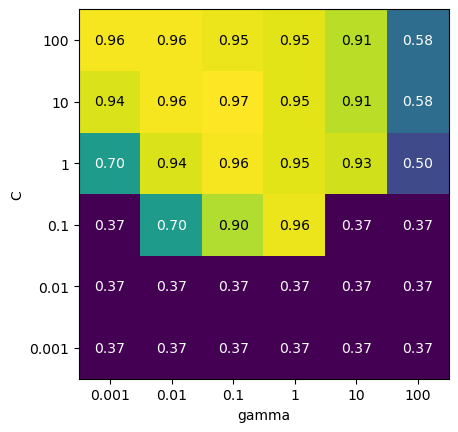

In [95]:
#Grid Search with Cross-Validation
#2.Through the use of GridSearchCV class

#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Splinting the dataset
#split data into train+validation set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

#Initiate a dictionary which contain the parameters
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
             "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

#Import the model selection method
from sklearn.model_selection import GridSearchCV
#Import the Model
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train,y_train)
#View the parameters and the score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {}".format(grid_search.best_score_))
#View the best estimator
print("The best estimator:\n{}".format(grid_search.best_estimator_))
print("\n\n\n")

#Analyzing the result of cross-validation
#The result is stored in cv_results_
#The value can be viewed through using pandas DataFrame
import pandas as pd
#Convert the result to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

#Plot a heat map for the mean cross-validation score
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores, xlabel = 'gamma', xticklabels = param_grid['gamma'], ylabel = 'C', yticklabels = param_grid['C'], cmap = "viridis")





In [99]:
#Search over spaces that are not grids
#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Splinting the dataset
#split data into train+validation set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
#set parameters
param_grid = [{"kernel": ["rbf"], "C":[0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}, {"kernel": ["linear"],"C": [0.001, 0.01, 0.1, 1, 10, 100]}]

#Import the model selection method
from sklearn.model_selection import GridSearchCV
#Import the Model
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train,y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best Cross-Validation score: {}".format(grid_search.best_score_))
print("\n\n")

#Views the result
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
#We display the transpose table so that it fits on the page
display(results.T)

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation score: 0.9731225296442687





,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.010983,0.01378,0.005387,0.0038,0.004811,0.004993,0.004498,0.003792,0.003984,0.003863,...,0.009245,0.005988,0.007387,0.008385,0.009786,0.016573,0.014977,0.009784,0.008389,0.008795
std_fit_time,0.011525,0.009559,0.002332,0.000403,0.000719,0.001996,0.000447,0.000747,0.000017,0.000684,...,0.004912,0.00219,0.001354,0.001017,0.008121,0.011533,0.017659,0.004255,0.004747,0.002423
mean_score_time,0.002996,0.005587,0.002798,0.0026,0.001967,0.002995,0.002798,0.002198,0.002597,0.002199,...,0.007216,0.002908,0.005992,0.00579,0.002797,0.026968,0.007988,0.003194,0.002594,0.003902
std_score_time,0.000634,0.005737,0.000748,0.00049,0.000062,0.001094,0.001165,0.0004,0.00049,0.0004,...,0.004279,0.000933,0.002093,0.006103,0.000977,0.040993,0.004971,0.0004,0.000799,0.001904
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [100]:
#Using different cross-validation strategies with grid search
#Nested cross-validation
#Loading the datasets
from sklearn.datasets import load_iris
iris = load_iris()

#Splinting the dataset
#split data into train+validation set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)

#Initiate a dictionary which contain the parameters
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100],
             "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

#Import the model selection method
from sklearn.model_selection import GridSearchCV, cross_val_score
#Import the Model
from sklearn.svm import SVC
#Implenting nested cross-validation in sklearn
#We call cross_val_score with an instance of GridSearchCV as the model
score = cross_val_score(GridSearchCV(SVC(), param_grid, cv = 5),iris.data, iris.target, cv =5)
print("Cross-Validation scores: ", score)
print("Mean Cross-validation score: ", score.mean())


Cross-Validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Cross-validation score:  0.9800000000000001



Dummy Clasifier
Unique predicted label: [False]
Test score: 0.90

Decision Tree Classifier
Test score: 0.92

Logistic Regression
Test score: 0.98

For Most frequent class
Confusion Matrix:
 [[403   0]
 [ 47   0]]

For Dummy model
Confusion Matrix:
 [[403   0]
 [ 47   0]]

For Decision Tree Classifier
Confusion Matrix:
 [[390  13]
 [ 24  23]]

For Logistic Regression
Confusion Matrix:
 [[402   1]
 [  6  41]]

F1 scores of the models we used above:
f1 score most frequent: 0.0
f1 score dummy: 0.0
f1 score tree: 0.5542168674698795
f1 score logistic regression: 0.9213483146067415

For Most Frequent class
              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450


For Dummy Model
              precision    recall  f1-score   su

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metr

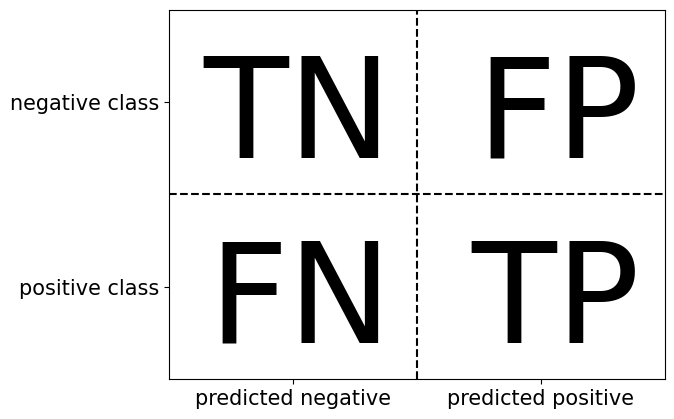

In [50]:
#Evaluation Metrics and Scoring
#Metrics for Binary Classification
#Kinds of Errors; Imbalanced datasets

#An Example of ctassifying a number nine(9)
#Import necessary libraries
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

#Datasets separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

#Build a model
#DummyClassifer makes predictions that ignore the input features
#The specific behavior of baseline is selected with the 'strategy' parameter
# strategy: {"most_frequent", "prior","stratified","uniform","constant"}, default = "prior"
#But here we use "most_frequent"
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train , y_train)
pred_most_frequent = dummy_majority.predict(X_test)
#Dummy which make random prediction
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
#View the accuracy
print("\nDummy Clasifier")
print("Unique predicted label: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

#Compare it with another model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 2).fit(X_train , y_train)
pred_tree = tree.predict(X_test)
print("\nDecision Tree Classifier")
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

#Compare again with another model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.1, max_iter = 1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression")
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

#Let use a confusion matrices to assess a model
from sklearn.metrics import confusion_matrix
#Confusion matrices of all the model we tried above
print("\nFor Most frequent class")
confusion_most_frequent = confusion_matrix(y_test , pred_most_frequent)
print("Confusion Matrix:\n {}".format(confusion_most_frequent))
print("\nFor Dummy model")
confusion_dummy = confusion_matrix(y_test , pred_dummy)
print("Confusion Matrix:\n {}".format(confusion_dummy))
print("\nFor Decision Tree Classifier")
confusion_tree = confusion_matrix(y_test , pred_tree)
print("Confusion Matrix:\n {}".format(confusion_tree))
print("\nFor Logistic Regression")
confusion_logreg = confusion_matrix(y_test , pred_logreg)
print("Confusion Matrix:\n {}".format(confusion_logreg))

#Using f1 score
print("\nF1 scores of the models we used above:")
from sklearn.metrics import f1_score
print("f1 score most frequent: {}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {}".format(f1_score(y_test, pred_logreg)))

#Comprehensive summary of precision, recall and f1_score can be found by using 'classification_report' convention function 
from sklearn.metrics import classification_report
print("\nFor Most Frequent class")
print(classification_report(y_test, pred_most_frequent, target_names = ["not nine", "nine"]))
print("\nFor Dummy Model")
print(classification_report(y_test, pred_dummy, target_names = ["not nine", "nine"]))
print("\nFor Tree Model")
print(classification_report(y_test, pred_tree, target_names = ["not nine", "nine"]))
print("\nFor Logistic Regression Model")
print(classification_report(y_test, pred_logreg, target_names = ["not nine", "nine"]))

#Illustrate the meaning of the confusion matrix
#print("\nIllustration")
import mglearn
#mglearn.plots.plot_confusion_matrix_illustration()
print("\nBinary Illustration")
mglearn.plots.plot_binary_confusion_matrix()







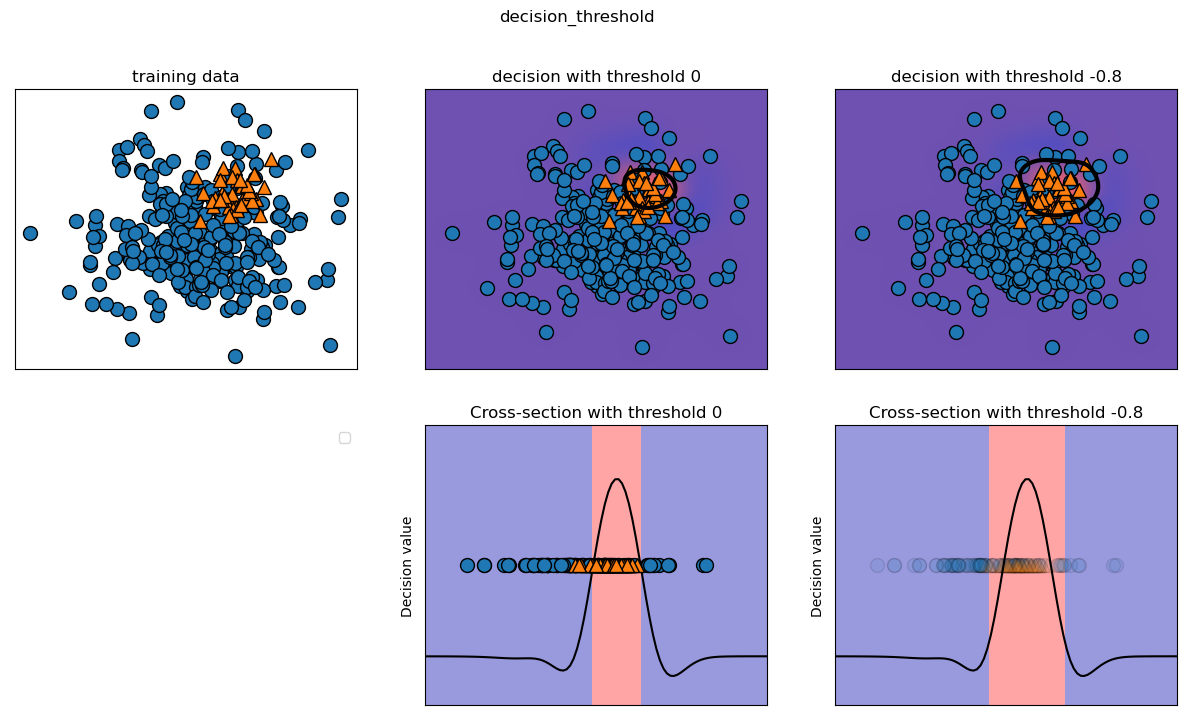

In [54]:
#Taking uncertainty into account
#Import necessary libraries
import mglearn

#Illustration
mglearn.plots.plot_decision_threshold()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)



For the threshold default = 0:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1004
           1       0.64      0.67      0.66       121

    accuracy                           0.92      1125
   macro avg       0.80      0.81      0.81      1125
weighted avg       0.93      0.92      0.93      1125

After lowering the threshold:
For the purpose of increasing 'recall'
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1004
           1       0.56      0.86      0.68       121

    accuracy                           0.91      1125
   macro avg       0.77      0.89      0.81      1125
weighted avg       0.94      0.91      0.92      1125

Possible presision are:
[0.11100917 0.11019284 0.11029412 ... 0.5        1.         1.        ]
Possible recall are:
[1.         0.99173554 0.99173554 ... 0.00826446 0.00826446 0.        ]
Possible thresholds are:
[-1.42644669 -1.41801331 -1.414

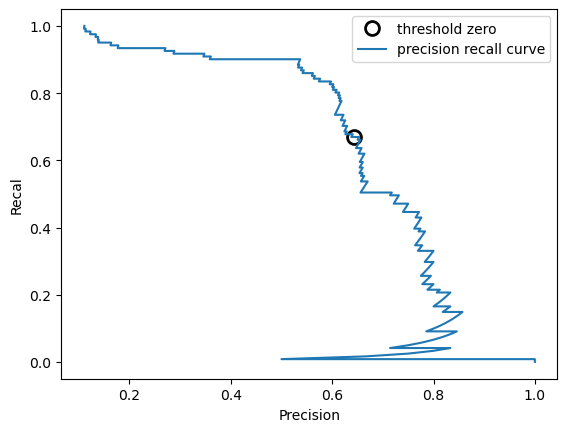

In [77]:
#Taking uncertainty into account
#Importing necessary libraries
import mglearn
import matplotlib.pyplot as plt
import numpy as np
#Loading the datasets
from mglearn.datasets import make_blobs
#4000 is for negative class, 500 is for positive class
X, y = make_blobs(n_samples = (4000, 500), centers = 2, cluster_std = [7.0, 2], random_state = 22)

#Dataset separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Building a model
from sklearn.svm import SVC
svc = SVC(gamma = .05).fit(X_train, y_train)

#Evaluation
#Precision,Recall,and f1_score
#We use classification_report
from sklearn.metrics import classification_report
print("\nFor the threshold default = 0:")
print(classification_report(y_test, svc.predict(X_test)))

#To classify more positive class we decrease the threshold, because the default is zero for positive class
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print("After lowering the threshold:")
print("For the purpose of increasing \'recall'")
print(classification_report(y_test, y_pred_lower_threshold))

#Precision-recall curves and ROC curves
#When building a new model its better to look all possible precision,recall and thresholds
from sklearn.metrics import precision_recall_curve
#precision_recall_curve function return a list of precision and recall values for all posible thresholds
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

print("Possible presision are:\n{}\nPossible recall are:\n{}\nPossible thresholds are:\n{}".format(precision, recall, thresholds))
#Find threshold closets to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o' ,markersize = 10,label = 'threshold zero',fillstyle = 'none',c = 'k', mew = 2)
plt.plot(precision,recall, label = 'precision recall curve')
plt.xlabel("Precision")
plt.ylabel("Recal")
plt.legend(loc = "best")





C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


f1_score of random forest: 0.610
f1_score of svm: 0.656
Average precision of random forest: 0.660
Average precision of svc: 0.666


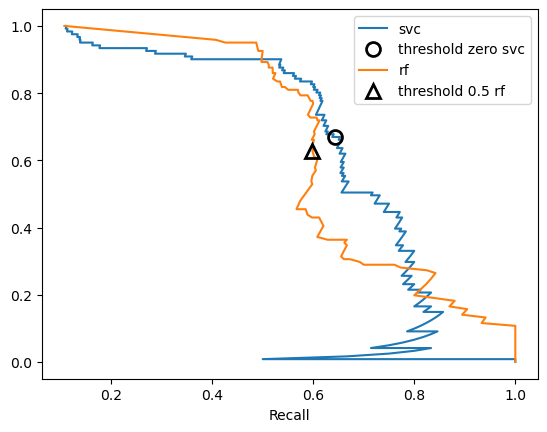

In [80]:
#Precision-recall curves and ROC curves
#For two different models

#Import necessary libraries
import mglearn
import matplotlib.pyplot as plt
import numpy as np
#Loading the datasets
from mglearn.datasets import make_blobs
#4000 is for negative class, 500 is for positive class
X, y = make_blobs(n_samples = (4000, 500), centers = 2, cluster_std = [7.0, 2], random_state = 22)

#Dataset separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Building a model
from sklearn.svm import SVC
svc = SVC(gamma = .05).fit(X_train, y_train)
#Precision-recall curves and ROC curves
#When building a new model its better to look all possible precision,recall and thresholds
from sklearn.metrics import precision_recall_curve
#precision_recall_curve function return a list of precision and recall values for all posible thresholds
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

#print("Possible presision are:\n{}\nPossible recall are:\n{}\nPossible thresholds are:\n{}".format(precision, recall, thresholds))
#Find threshold closets to zero
close_zero = np.argmin(np.abs(thresholds))

#Compare it with random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0 ,max_features = 2)
rf.fit(X_train , y_train)
#RandomForestClassifier ha predict_proba but not decision function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

#plotting the grapg
plt.plot(precision, recall, label = "svc")
plt.plot(precision[close_zero], recall[close_zero] , "o", markersize = 10, label = "threshold zero svc",fillstyle = "none", c ="k",mew = 2)

plt.plot(precision_rf, recall_rf, label = "rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c= 'k',markersize = 10, label = "threshold 0.5 rf", fillstyle = "none",mew = 2)
plt.xlabel("Precision")
plt.xlabel("Recall")
plt.legend(loc = "best")

#Compare f1_score
from sklearn.metrics import f1_score
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svm: {:.3f}".format(f1_score(y_test,svc.predict(X_test))))

#To summarize the result, we compute the integral or area under the curve of precision-recall curve
#We use average_precision_score
from sklearn.metrics import average_precision_score
AveragePrecision_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
AveragePrecision_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(AveragePrecision_rf))
print("Average precision of svc: {:.3f}".format(AveragePrecision_svc))




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


AUC for random forest: 0.937
AUC for SVC: 0.916


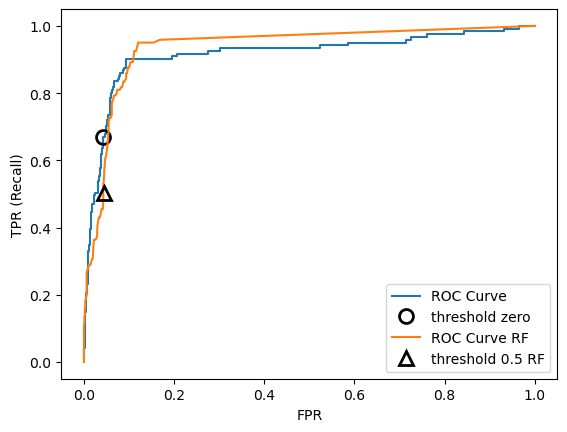

In [86]:
#Receiver operating characteristics(ROC) and AUC
import mglearn
import matplotlib.pyplot as plt
import numpy as np

#loading the datasets
from mglearn.datasets import make_blobs
#4000 is for negative class, 500 is for positive class
X, y = make_blobs(n_samples = (4000, 500), centers = 2, cluster_std = [7.0, 2], random_state = 22)

#Dataset separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

#Building a model
#SVC
from sklearn.svm import SVC
svc = SVC(gamma = .05).fit(X_train, y_train)
#The ROC curve can be computed using the roc_curve function
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
#find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize = 10, label = "threshold zero", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

#Building another model
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 0 ,max_features = 2)
rf.fit(X_train , y_train)
#The ROC curve can be computed using the roc_curve function
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label = "ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
#find threshold closest to zero
close_default_rf = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize = 10, label = "threshold 0.5 RF", fillstyle = "none", c = 'k', mew = 2)
plt.legend(loc = 4)

##To summarize the result, we compute the area under the curve(AUC)
#We use roc_auc_score
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for random forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))



gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


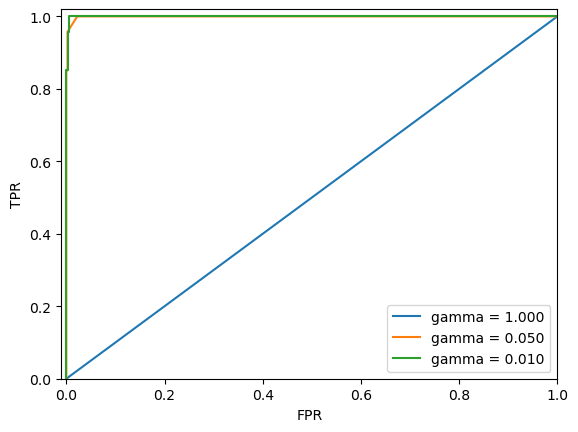

In [90]:
#Another Examples
#Import necessary libraries
import mglearn
import matplotlib.pyplot as plt
import numpy as np

#Load the datasets
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9

#Datasets separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)
#Building a model
#SVC
from sklearn.svm import SVC
svc = SVC(gamma = .05).fit(X_train, y_train)
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr,label = "gamma = {:.3f}".format(gamma))
    
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01,1)
plt.ylim(0, 1.02)
plt.legend(loc = "best")


Accuracy: 0.9533333333333334
Test accuracy:0.9533333333333334
Confusion Matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94     

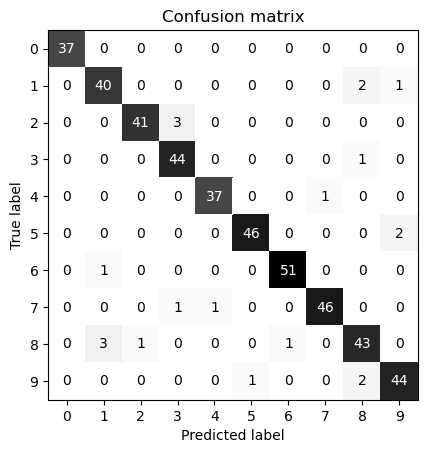

In [17]:
#Metrics for Multiclass Classification

#Importing the necessary libraries
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

#Loading the datasets
from sklearn.datasets import load_digits
digits = load_digits()

#spliting the datasets
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(digits.data, digits.target , random_state = 0)

#Building the logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train , y_train)
pred = lr.predict(X_test)

#Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
print("Accuracy: {}".format(accuracy_score(y_test, pred ,normalize = True)))
print("Test accuracy:{}".format(lr.score(X_test, y_test)))
print("Confusion Matrix:\n{}".format(confusion_matrix(y_test , pred)))

#Ploting
score_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel = "Predicted label", ylabel = "True label", xticklabels = digits.target_names, yticklabels = digits.target_names, cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

#Compute precision,recall, f1_score by using a classification_report
print(classification_report(y_test, pred))

#If you care about each sample equally much, it is recommended to use the "micro" f1_score
print("Micro average f1 score: {}".format(f1_score(y_test, pred, average = "micro" )))
#If you care about each class equally much, it is recommended to use the "macro" average f1_score
print("Macro average f1 score: {}".format(f1_score(y_test, pred, average = "macro" )))








In [29]:
#Using Evaluation metrics in model selection
#1.Model selection
#Loading the datasets
from sklearn.datasets import load_digits
digits = load_digits()

#spliting the datasets
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(digits.data, digits.target , random_state = 0)


#Default scoring for classification is accuracy
print("\nFor SVC")
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
print("Default scoring:\n{}".format(cross_val_score(SVC(), digits.data, digits.target == 9)))
#providing scoring = "accuracy" doesn't change the result
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "accuracy")
print("Explicity accuracy scoring:\n{}".format(explicit_accuracy))
#To change, we must set the accuracy = roc_auc
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "roc_auc")
print("AUC scoring:\n{}".format(roc_auc))

#Testing another model
print("\nFor Logistic Regression")
from sklearn.linear_model import LogisticRegression
print("Default scoring:\n{}".format(cross_val_score(LogisticRegression(), digits.data, digits.target == 9)))
#providing scoring = "accuracy" doesn't change the result
explicit_accuracy = cross_val_score(LogisticRegression(max_iter = 10000000), digits.data, digits.target == 9, scoring = "accuracy")
print("Explicity accuracy scoring:\n{}".format(explicit_accuracy))
#To change, we must set the accuracy = roc_auc
roc_auc = cross_val_score(LogisticRegression(max_iter = 10000000), digits.data, digits.target == 9, scoring = "roc_auc")
print("AUC scoring:\n{}".format(roc_auc))







For SVC
Default scoring:
[0.975      0.99166667 1.         0.99442897 0.98050139]
Explicity accuracy scoring:
[0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring:
[0.99717078 0.99854252 1.         0.999828   0.98400413]

For Logistic Regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Default scoring:
[0.96388889 0.925      0.98050139 0.98050139 0.95264624]
Explicity accuracy scoring:
[0.96111111 0.93611111 0.97771588 0.97771588 0.96657382]
AUC scoring:
[0.99125514 0.95138889 0.99561404 0.99174407 0.97832817]


In [41]:
#2.Picking the best parameter after model selection
#Loading the datasets
from sklearn.datasets import load_digits
digits = load_digits()

#spliting the datasets
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9 , random_state = 0)

#Import a model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score
#We provide a somewhat bad grid to illustrate the point
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}

#Using the default scoring of accuracy
grid = GridSearchCV(SVC(), param_grid = param_grid)
grid.fit(X_train,y_train)
print("Grid Search with accuracy")
print("Best parameters:{}".format(grid.best_params_))
print("Best cross Validation score(accuracy): {}".format(grid.best_score_))
print("Test set AUC: {}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {}".format(grid.score(X_test, y_test)))

#Using the AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring = "roc_auc")
grid.fit(X_train,y_train)
print("\nGrid Search with AUC")
print("Best parameters:{}".format(grid.best_params_))
print("Best cross Validation score(AUC): {}".format(grid.best_score_))
print("Test set AUC: {}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {}".format(grid.score(X_test, y_test)))





Grid Search with accuracy
Best parameters:{'gamma': 0.0001}
Best cross Validation score(accuracy): 0.975500481894534
Test set AUC: 0.9919222849902327
Test set accuracy: 0.9733333333333334

Grid Search with AUC
Best parameters:{'gamma': 0.01}
Best cross Validation score(AUC): 0.997999457969529
Test set AUC: 0.999524840293543
Test set accuracy: 0.999524840293543


In [54]:
#To view the available scores
from sklearn.metrics import SCORERS
print("Available scorers:\n".format(sorted(SCORERS.keys())))

Available scorers:



In [55]:
import sklearn
print(dir(sklearn.metrics))

['ConfusionMatrixDisplay', 'DetCurveDisplay', 'DistanceMetric', 'PrecisionRecallDisplay', 'RocCurveDisplay', 'SCORERS', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_classification', '_dist_metrics', '_pairwise_fast', '_plot', '_ranking', '_regression', '_scorer', 'accuracy_score', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'auc', 'average_precision_score', 'balanced_accuracy_score', 'brier_score_loss', 'calinski_harabasz_score', 'check_scoring', 'classification_report', 'cluster', 'cohen_kappa_score', 'completeness_score', 'confusion_matrix', 'consensus_score', 'coverage_error', 'd2_tweedie_score', 'davies_bouldin_score', 'dcg_score', 'det_curve', 'euclidean_distances', 'explained_variance_score', 'f1_score', 'fbeta_score', 'fowlkes_mallows_score', 'get_scorer', 'hamming_loss', 'hinge_loss', 'homogeneity_completeness_v_measure', 'homogeneity_score', 'jaccard_score', 'label_ranking_a